In [1]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from scipy.cluster.vq import whiten, kmeans2

In [3]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '6343e2401b274e4b9d3233b7291115e5' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [4]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/496'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/6/63/Rio_Ave_FC.svg',
  'name': 'FC Rio Ave',
  'shortName': 'Rio Ave',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/503/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/503/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/503'}},
  'code': 'FCP',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/ed/FC_Porto_1922-2005.svg',
  'name': 'FC Porto',
  'shortName': 'Porto',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/583/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/583/players'},
   'self': {'href

In [5]:
for team in teams:
    players = call_api(team['_links']['players']['href'], 'players')
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    goals = 0
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            goals += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
        else:
            goals += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
    print('Team "{}", {} players, {} goals'.format(team['name'], len(players), goals))
    team['players'] = players
    team['goals'] = goals

Team "FC Rio Ave", 23 players, 35 goals
Team "FC Porto", 26 players, 87 goals
Team "Moreirense FC", 25 players, 26 goals
Team "FC Paços de Ferreira", 31 players, 30 goals
Team "Sporting CP", 27 players, 63 goals
Team "Maritimo Funchal", 28 players, 32 goals
Team "CD Tondela", 26 players, 33 goals
Team "SL Benfica", 24 players, 76 goals
Team "Boavista Porto FC", 29 players, 29 goals
Team "FC Arouca", 21 players, 0 goals
Team "Vitoria Setubal", 28 players, 35 goals
Team "C.F. Os Belenenses", 25 players, 26 goals
Team "Vitoria Guimaraes", 30 players, 38 goals
Team "Sporting Braga", 24 players, 65 goals
Team "GD Estoril Praia", 29 players, 25 goals
Team "Feirense", 29 players, 27 goals
Team "Nacional Funchal", 18 players, 0 goals
Team "G.D. Chaves", 22 players, 34 goals


In [6]:
team_for_pd = []
for team in teams:
    if team['players']:
        team_for_pd.append({'name': team['name'], 'players': len(team['players']), 'goals': team['goals']})
team_for_pd

[{'goals': 35, 'name': 'FC Rio Ave', 'players': 23},
 {'goals': 87, 'name': 'FC Porto', 'players': 26},
 {'goals': 26, 'name': 'Moreirense FC', 'players': 25},
 {'goals': 30, 'name': 'FC Paços de Ferreira', 'players': 31},
 {'goals': 63, 'name': 'Sporting CP', 'players': 27},
 {'goals': 32, 'name': 'Maritimo Funchal', 'players': 28},
 {'goals': 33, 'name': 'CD Tondela', 'players': 26},
 {'goals': 76, 'name': 'SL Benfica', 'players': 24},
 {'goals': 29, 'name': 'Boavista Porto FC', 'players': 29},
 {'goals': 0, 'name': 'FC Arouca', 'players': 21},
 {'goals': 35, 'name': 'Vitoria Setubal', 'players': 28},
 {'goals': 26, 'name': 'C.F. Os Belenenses', 'players': 25},
 {'goals': 38, 'name': 'Vitoria Guimaraes', 'players': 30},
 {'goals': 65, 'name': 'Sporting Braga', 'players': 24},
 {'goals': 25, 'name': 'GD Estoril Praia', 'players': 29},
 {'goals': 27, 'name': 'Feirense', 'players': 29},
 {'goals': 0, 'name': 'Nacional Funchal', 'players': 18},
 {'goals': 34, 'name': 'G.D. Chaves', 'play

In [7]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,goals,name,players
0,35,FC Rio Ave,23
1,87,FC Porto,26
2,26,Moreirense FC,25
3,30,FC Paços de Ferreira,31
4,63,Sporting CP,27
5,32,Maritimo Funchal,28
6,33,CD Tondela,26
7,76,SL Benfica,24
8,29,Boavista Porto FC,29
9,0,FC Arouca,21


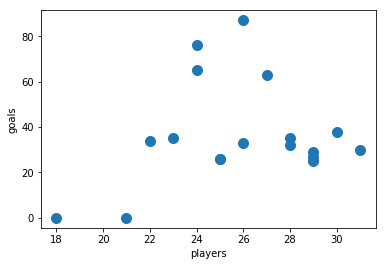

In [8]:
teams_pd.plot.scatter(x='players', y='goals', s=100)

In [9]:
del teams_pd['name']
teams_pd

,goals,players
0,35,23
1,87,26
2,26,25
3,30,31
4,63,27
5,32,28
6,33,26
7,76,24
8,29,29
9,0,21


In [10]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 1.57617765,  6.89139114],
       [ 3.9179273 ,  7.79026824],
       [ 1.17087482,  7.49064254],
       [ 1.35100941,  9.28839675],
       [ 2.83711977,  8.08989394],
       [ 1.44107671,  8.38951965],
       [ 1.48611035,  7.79026824],
       [ 3.42255718,  7.19101684],
       [ 1.30597577,  8.68914535],
       [ 0.        ,  6.29213973],
       [ 1.57617765,  8.38951965],
       [ 1.17087482,  7.49064254],
       [ 1.71127859,  8.98877105],
       [ 2.92718706,  7.19101684],
       [ 1.12584118,  8.68914535],
       [ 1.21590847,  8.68914535],
       [ 0.        ,  5.39326263],
       [ 1.531144  ,  6.59176544]])

In [11]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 1.40167227,  8.61423892],
        [ 3.27619782,  7.56554897],
        [ 0.90817855,  6.69164067]]),
 array([2, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2]))

In [12]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'g',
 'b',
 'r',
 'g',
 'r',
 'r',
 'g',
 'r',
 'b',
 'r',
 'b',
 'r',
 'g',
 'r',
 'r',
 'b',
 'b']

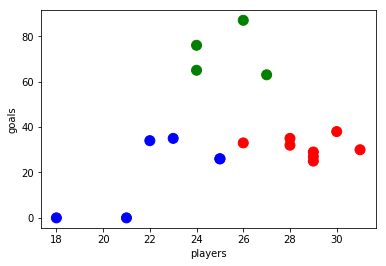

In [13]:
teams_pd.plot.scatter(x='players', y='goals', c=colors, s=100)

In [15]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

C:\Users\Ne0\Anaconda3\lib\site-packages\scipy\cluster\vq.py:660: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


(array([[ 1.38960968,  8.73194902],
        [-0.30075335,  8.36854093],
        [ 1.38703633,  7.25094198],
        [ 3.27619782,  7.56554897],
        [ 0.        ,  5.84270118]]),
 array([2, 3, 2, 0, 3, 0, 2, 3, 0, 4, 0, 2, 0, 3, 0, 0, 4, 2]))

In [16]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'y',
 'b',
 'r',
 'y',
 'r',
 'b',
 'y',
 'r',
 'm',
 'r',
 'b',
 'r',
 'y',
 'r',
 'r',
 'm',
 'b']

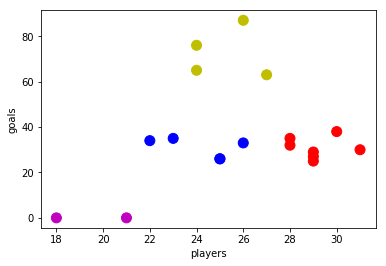

In [17]:
teams_pd.plot.scatter(x='players', y='goals', c=colors, s=100)